# 1 Load Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train_after_missing_value.csv')
# test = pd.read_csv('data/test_after_missing_value.csv')

# 2 Finding Outliers

2.1 IQR Score Method

In [3]:
n = (train.dtypes != 'object')
num_train_cols = list(n[n].index) # a list of numerical features of train

In [4]:
train_mean = train.mean()
train_std = train.std()

In [5]:
train.shape

(553287, 256)

In [6]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0        2.766430e+05
TransactionID     2.950750e+05
isFraud           0.000000e+00
TransactionDT     8.232778e+06
TransactionAmt    8.206250e+01
                      ...     
id_35                      NaN
id_36                      NaN
id_37                      NaN
id_38                      NaN
DeviceType                 NaN
Length: 256, dtype: float64


In [7]:
print((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))

        Unnamed: 0  TransactionID  isFraud  TransactionDT  TransactionAmt  \
0            False          False    False          False           False   
1            False          False    False          False           False   
2            False          False    False          False           False   
3            False          False    False          False           False   
4            False          False    False          False           False   
...            ...            ...      ...            ...             ...   
553282       False          False    False          False           False   
553283       False          False    False          False           False   
553284       False          False    False          False           False   
553285       False          False    False          False           False   
553286       False          False    False          False            True   

        card1  card2  card3  card5  addr1  ...  id_15  id_16  id_28  id_29 

In [8]:
train_outlier_IQR = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
train_outlier_IQR.shape

(39516, 256)

In [10]:
train_outlier_IQR = train_outlier_IQR.reset_index()
del train_outlier_IQR['index']
train_outlier_IQR

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
0,1,2987001.0,0.0,86401.0,29.000000,2755.0,404.0,150.0,102.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,2987014.0,0.0,86596.0,10.500000,11839.0,490.0,150.0,226.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,2987029.0,0.0,86979.0,37.000000,12932.0,361.0,150.0,226.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38,2987039.0,0.0,87202.0,39.937500,12598.0,111.0,150.0,166.0,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43,2987044.0,0.0,87266.0,39.500000,9281.0,555.0,150.0,195.0,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39511,553245,3577498.0,0.0,15810263.0,200.000000,12577.0,268.0,150.0,166.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39512,553252,3577505.0,0.0,15810398.0,222.000000,2884.0,490.0,150.0,226.0,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39513,553257,3577510.0,0.0,15810518.0,24.500000,9500.0,321.0,150.0,226.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39514,553283,3577536.0,0.0,15811049.0,39.500000,10444.0,225.0,150.0,224.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_outlier_IQR.describe()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,id_15,id_16,id_28,id_29,id_34,id_35,id_36,id_37,id_38,DeviceType
count,39516.000000,3.951600e+04,39516.0,3.951600e+04,39516.000000,39516.000000,39516.000000,39516.0,39516.000000,39516.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,339333.573464,3.354032e+06,0.0,9.288426e+06,83.506354,9958.212117,346.002814,150.0,199.835472,284.114941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,133936.133794,1.417790e+05,0.0,3.927705e+06,54.807679,4844.938633,152.943925,0.0,39.884192,96.431452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.987001e+06,0.0,8.640100e+04,5.000000,1022.000000,100.000000,150.0,100.000000,104.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,256838.500000,3.267939e+06,0.0,6.833424e+06,44.500000,6457.000000,203.000000,150.0,166.000000,204.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,347772.000000,3.363391e+06,0.0,9.407542e+06,59.000000,9880.000000,330.000000,150.0,226.000000,272.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,448124.000000,3.470839e+06,0.0,1.259249e+07,113.000000,13893.000000,490.000000,150.0,226.000000,327.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,553284.000000,3.577537e+06,0.0,1.581108e+07,248.000000,18395.000000,600.000000,150.0,232.000000,502.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.2 Box Plot

2.2.1 Boxplot of Initial Data

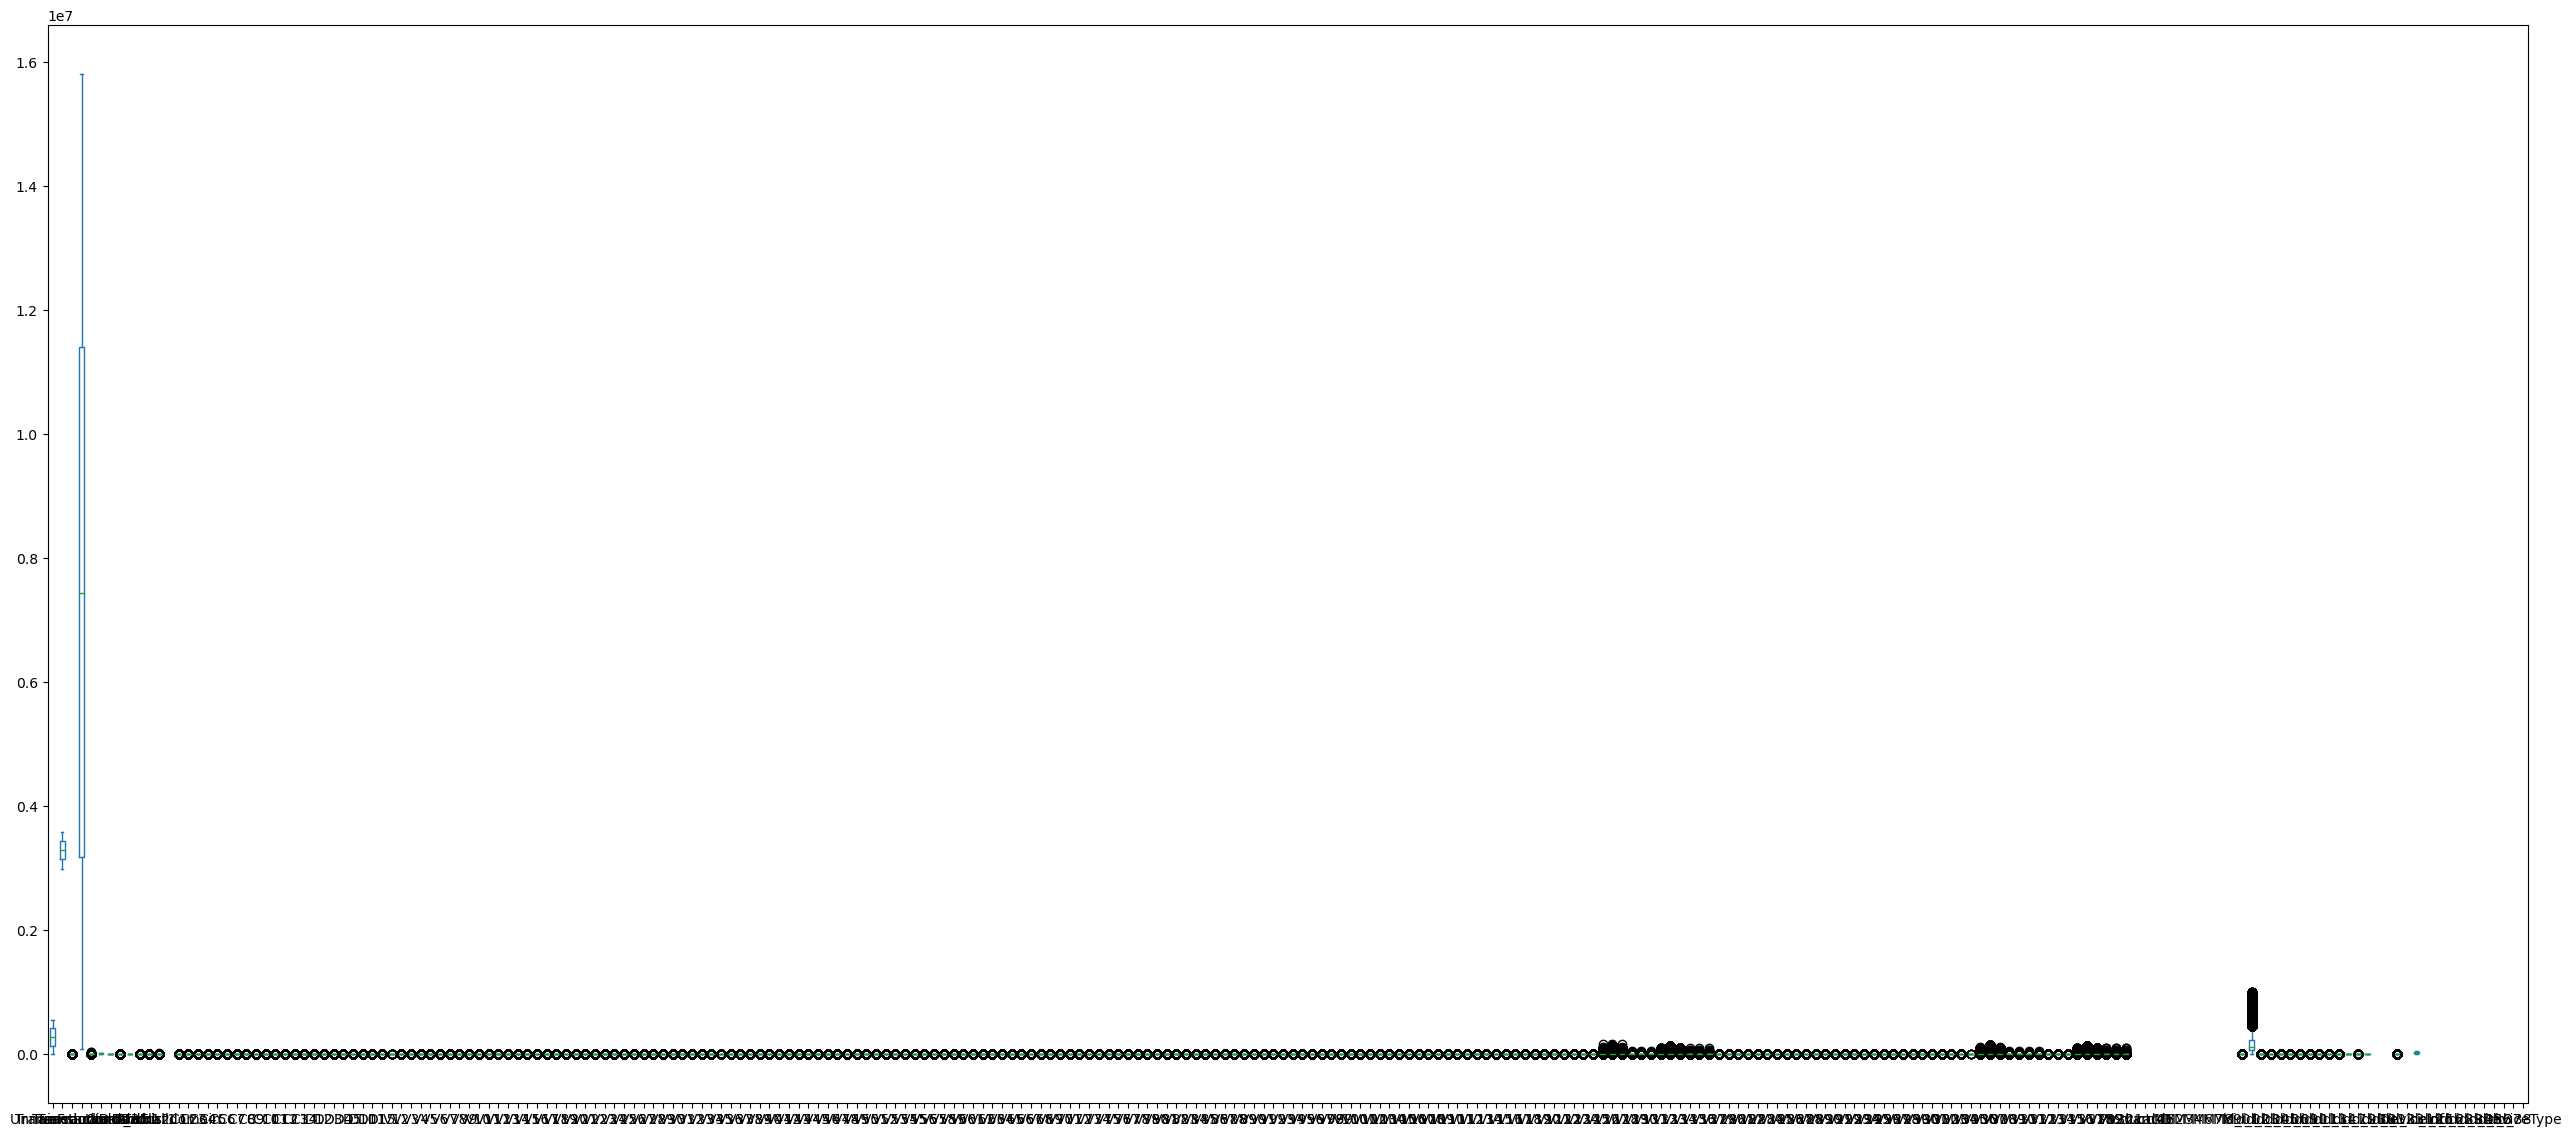

In [14]:
train.plot(x=train.index.name, kind='box', figsize=(32, 14))
plt.show()

2.2.2 Boxplot of Dropped Outlier Data

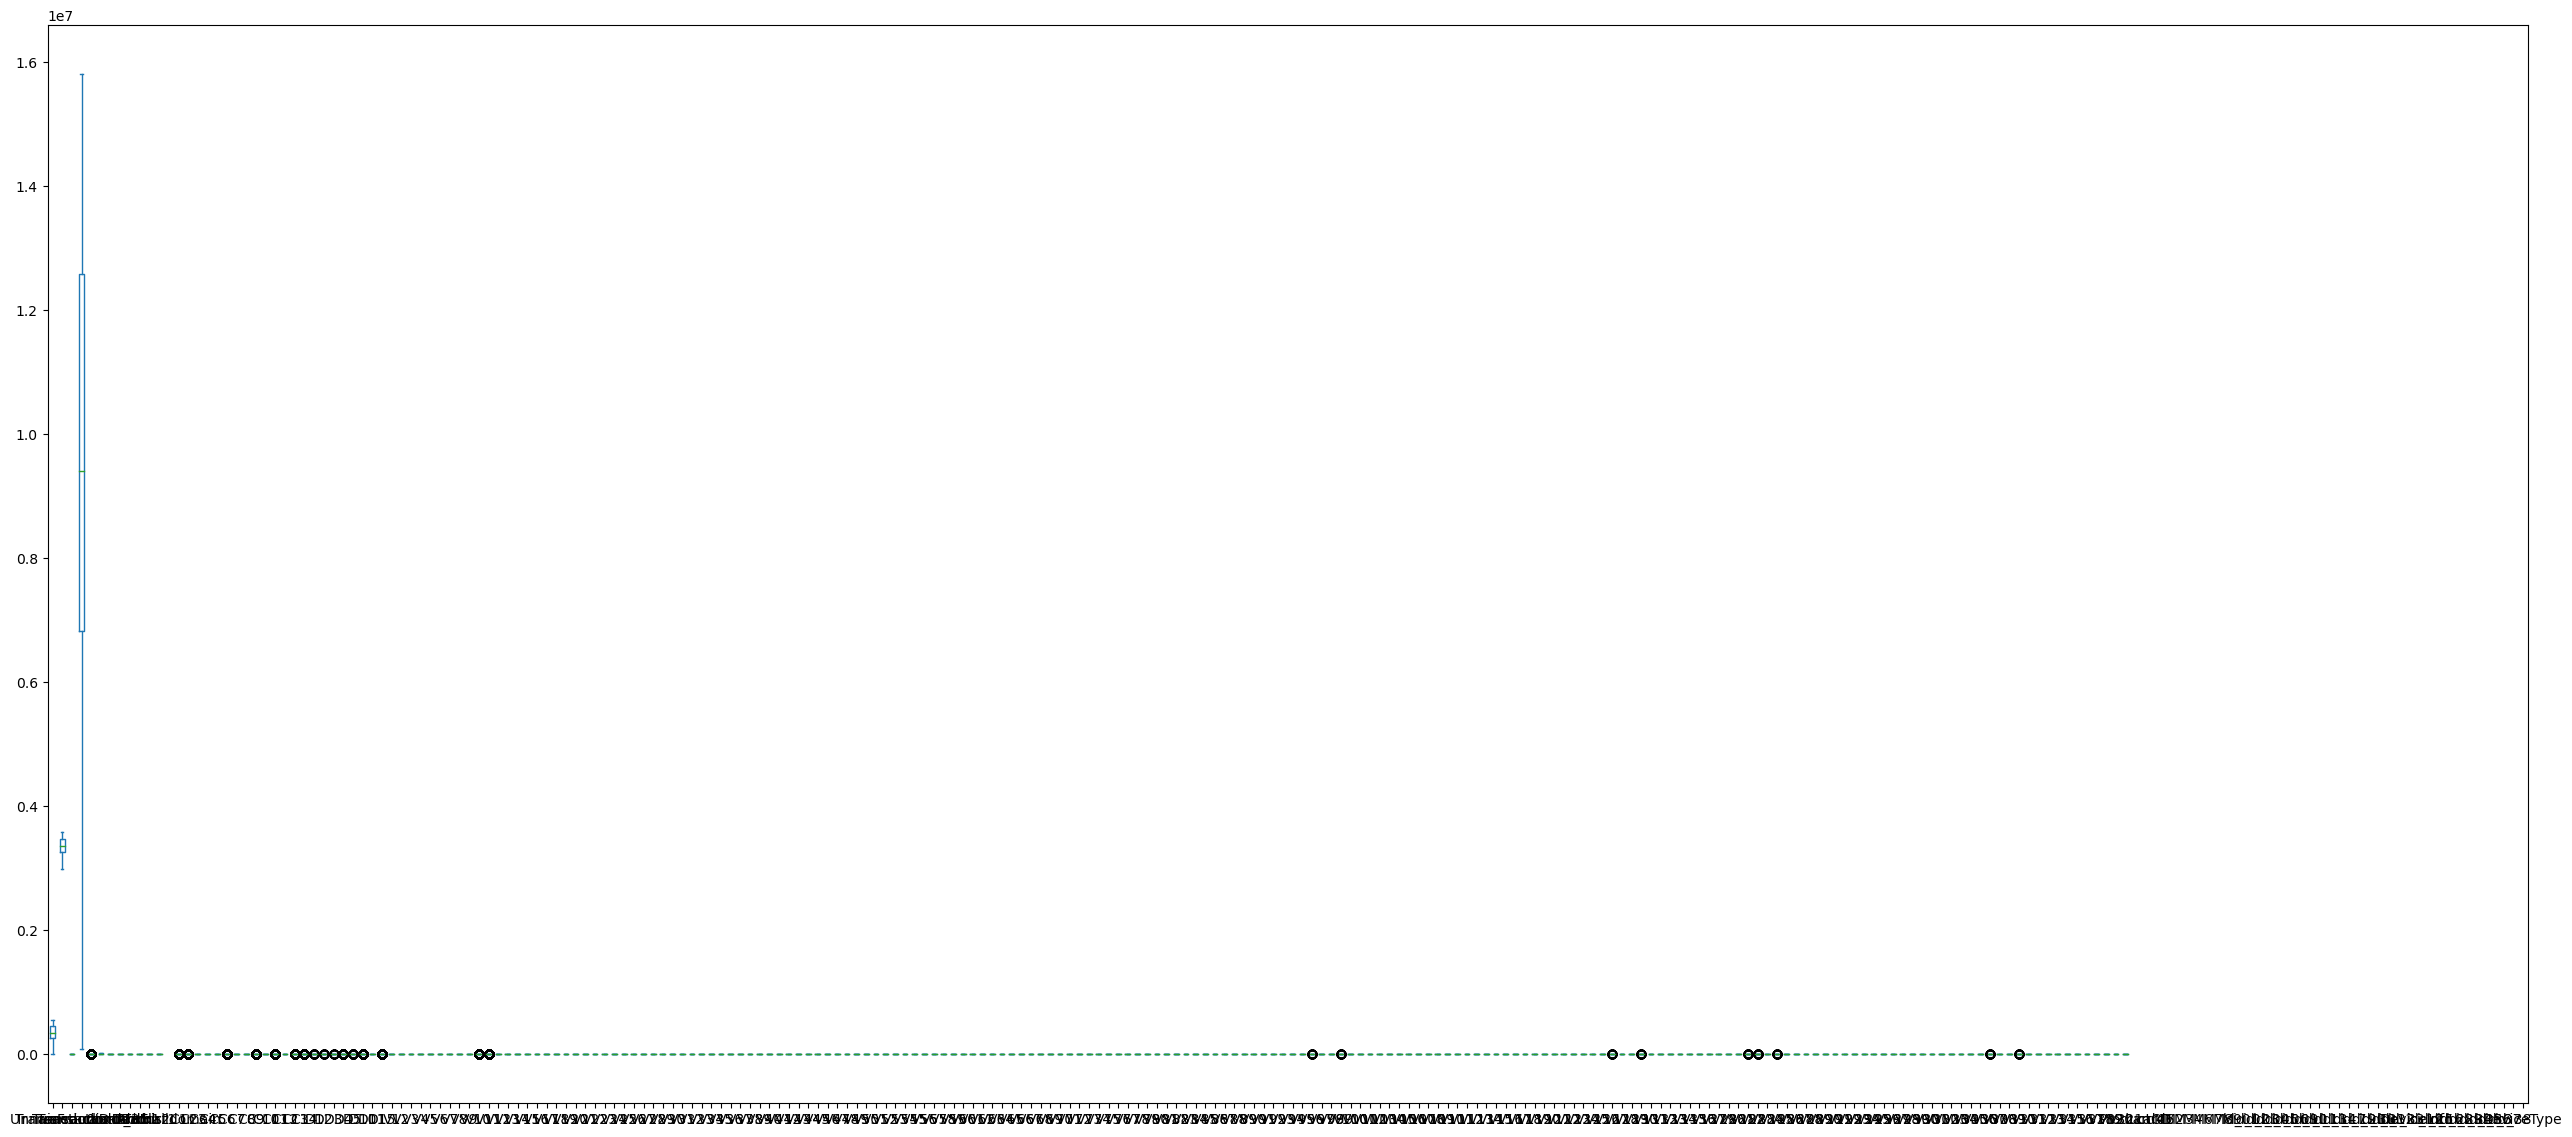

In [15]:
train_outlier_IQR.plot(x=train_outlier_IQR.index.name, kind='box', figsize=(32, 14))
plt.show()